<a href="https://colab.research.google.com/github/Pedro-A-D-S/diamonds-price/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

Este projeto visa fazer uma análise exploratória dos preços de diamantes e aplicar um modelo preditivo para o preço.

## Análise exploratória dos dados

In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


diamond = sns.load_dataset('diamonds')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [327]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Descrição das features do dataset

Carat : Peso do diamante em quilates (1 quilate = 2 gramas)

Cut : Descreve a qualidade do corte do diamante. A qualidade aumenta na ordem: Fair, Good, Very Good, Premium, Ideal.

Color : Cor do diamante, com D sendo a melhor e J sendo a pior.

Clarity : A clareza do diamante se refere a falta de falhas e imperfeições.

Depth : The altura do diamante.

Profundidade: A altura do diamante, medida do culet (um culet é uma face plana no fundo de uma pedra preciosa) até a mesa, dividida pela média do diâmetro Girdle. Em diamantes circulares, não há um que seja perfeitamente redondo. Portanto, cada diâmetro não é o mesmo e por isso toma-se o valor médio.

Table : A largura do diamante expressa como uma porcentagem de seu diâmetro médio.

Price : Preço do diamante em dólares.

X : Largura do diamante em milímetros.

Y : Altura do diamante em milímetros.

Z : Comprimento do diamante em milímetros.

## Descrição do dataset

In [328]:
diamond.shape

(53940, 10)

In [329]:
print('O dataset possui {} linhas e {} colunas.'.format(diamond.shape[0], diamond.shape[1]))

O dataset possui 53940 linhas e 10 colunas.


In [330]:
print('Há {} linhas e {} colunas no dataset.'.format(diamond.shape[0], diamond.shape[1]))
print('Há 5 tipos de cortes de diamante diferentes, são eles: {}, {}, {}, {} e {}.'.format(diamond['cut'].unique()[0], diamond['cut'].unique()[1],
                                                                                          diamond['cut'].unique()[2], diamond['cut'].unique()[3],
                                                                                          diamond['cut'].unique()[4]))
print('Há 7 cores de diamantes: {}, {}, {}, {}, {}, {}, {}.'.format(diamond['color'].unique()[0], diamond['color'].unique()[1], diamond['color'].unique()[2],
                                                                    diamond['color'].unique()[3], diamond['color'].unique()[4], diamond['color'].unique()[5],
                                                                    diamond['color'].unique()[6]))
print('Há 8 tipos de clareza diferentes: {}, {}, {}, {}, {}, {}, {}, {}.'.format(diamond['clarity'].unique()[0], diamond['clarity'].unique()[1],
                                                                                 diamond['clarity'].unique()[2], diamond['clarity'].unique()[3],
                                                                                 diamond['clarity'].unique()[4], diamond['clarity'].unique()[5],
                                                                                 diamond['clarity'].unique()[6], diamond['clarity'].unique()[7]))

Há 53940 linhas e 10 colunas no dataset.
Há 5 tipos de cortes de diamante diferentes, são eles: Ideal, Premium, Good, Very Good e Fair.
Há 7 cores de diamantes: E, I, J, H, F, G, D.
Há 8 tipos de clareza diferentes: SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF.


In [331]:
descricao = diamond.describe().round(2)
descricao

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


Daqui é possível obter diversas informações relevantes sobre os dados analisados como o preço médio (mean) de un diamante é quase 4 mil dólares. Porém ao se comparar os preços mínimos e máximos, estes espalhados por uma ampla gama de valores, como indica o alto desvio padrão (std). Outro aspecto a levar em consideração é a existência dos valores x = y = z = 0, o que os torna irreais pois não há diamantes com essas dimensões espaciais.

## Removendo outliers

In [332]:
diamond = diamond[(diamond[['x','y','z']] != 0).all(axis = 1)]

In [333]:
diamond.describe().round(2)

,carat,depth,table,price,x,y,z
count,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00
mean,0.80,61.75,57.46,3930.99,5.73,5.73,3.54
std,0.47,1.43,2.23,3987.28,1.12,1.14,0.70
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5323.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


Agora não há mais dados que não fazem sentido.

## Obtendo informações

In [334]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53920 non-null  float64 
 1   cut      53920 non-null  category
 2   color    53920 non-null  category
 3   clarity  53920 non-null  category
 4   depth    53920 non-null  float64 
 5   table    53920 non-null  float64 
 6   price    53920 non-null  int64   
 7   x        53920 non-null  float64 
 8   y        53920 non-null  float64 
 9   z        53920 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [335]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

O dataset não possui dados nulos.

## Extraindo estatísticas descritivas do preço por categoria

# Clarity

In [336]:
sns.set_palette("winter")
sns.set_style("darkgrid")

In [337]:
clarity_counts = diamond['clarity'].value_counts()
clarity_counts = pd.DataFrame(diamond['clarity'].value_counts())
clarity_counts

,clarity
SI1,13063
VS2,12254
SI2,9185
VS1,8170
VVS2,5066
VVS1,3654
IF,1790
I1,738


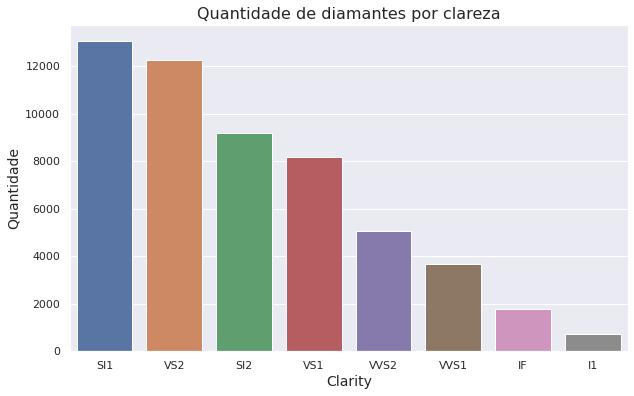

In [338]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.countplot(x = "clarity", data = diamond, order = diamond['clarity'].value_counts().index)
ax.set_title('Quantidade de diamantes por clareza', fontsize = 16)
ax.set_xlabel('Clarity', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

É possível notar a queda de número de diamantes com a clareza.

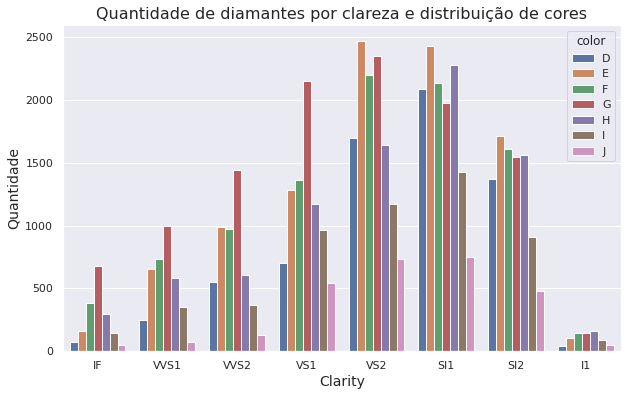

In [339]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.countplot(x = "clarity", data = diamond, hue = 'color')
ax.set_title('Quantidade de diamantes por clareza e distribuição de cores', fontsize = 16)
ax.set_xlabel('Clarity', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

Há predominância das cores E e G nos cortes com as maiores quantidades de diamantes do dataset, o que vai sendo atenuada conforme estas quantidades diminuem.

In [340]:
diamond_mean_price_by_clarity = diamond.groupby(['clarity']).mean().price.round(2).sort_values(ascending = False)
diamond_mean_price_by_clarity = pd.DataFrame(diamond_mean_price_by_clarity)
diamond_mean_price_by_clarity.rename(columns = {'price':'média de preço'}, inplace = True)
diamond_mean_price_by_clarity

,média de preço
clarity,
SI2,5060.44
SI1,3994.11
I1,3926.19
VS2,3922.87
VS1,3839.14
VVS2,3283.74
IF,2864.84
VVS1,2519.51


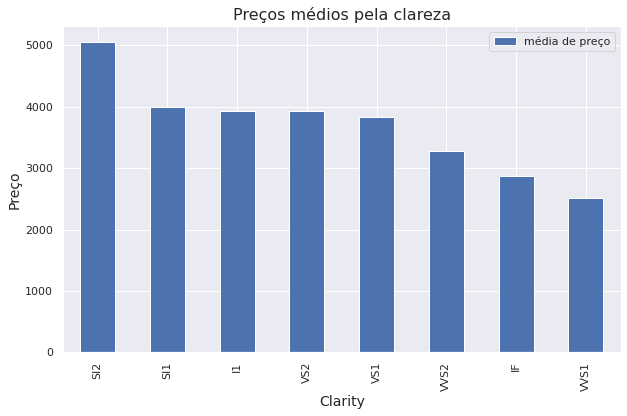

In [341]:
diamond_mean_price_by_clarity.plot.bar()
plt.title("Preços médios pela clareza", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [342]:
diamond_median_price_by_clarity = diamond.groupby(['clarity']).median().price.round(2).sort_values(ascending = False)
diamond_median_price_by_clarity = pd.DataFrame(diamond_median_price_by_clarity)
diamond_median_price_by_clarity.rename(columns = {'price':'mediana do preço'}, inplace = True)
diamond_median_price_by_clarity

,mediana do preço
clarity,
SI2,4072.0
I1,3346.0
SI1,2822.0
VS2,2052.0
VS1,2005.0
VVS2,1311.0
VVS1,1092.5
IF,1080.0


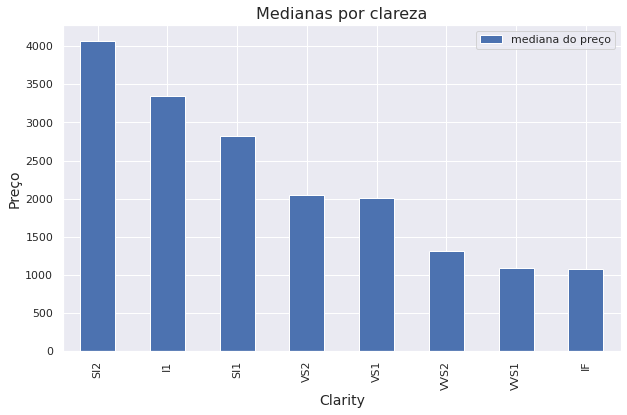

In [343]:
diamond_median_price_by_clarity.plot.bar()
plt.title("Medianas por clareza", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [344]:
diamond_std_price_by_clarity = diamond.groupby(['clarity']).std().price.round(2).sort_values(ascending = False)
diamond_std_price_by_clarity = pd.DataFrame(diamond_std_price_by_clarity)
diamond_std_price_by_clarity.rename(columns = {'price':'desvio padrão do preço'}, inplace = True)
diamond_std_price_by_clarity

,desvio padrão do preço
clarity,
SI2,4256.94
VS2,4040.07
VS1,4011.89
IF,3920.25
VVS2,3821.65
SI1,3796.69
VVS1,3328.18
I1,2811.62


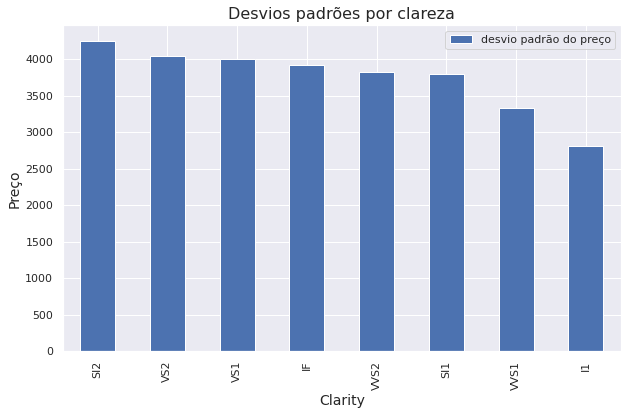

In [345]:
diamond_std_price_by_clarity.plot.bar()
plt.title("Desvios padrões por clareza", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

# Cut

In [346]:
cut_counts = diamond['cut'].value_counts()
cut_counts

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

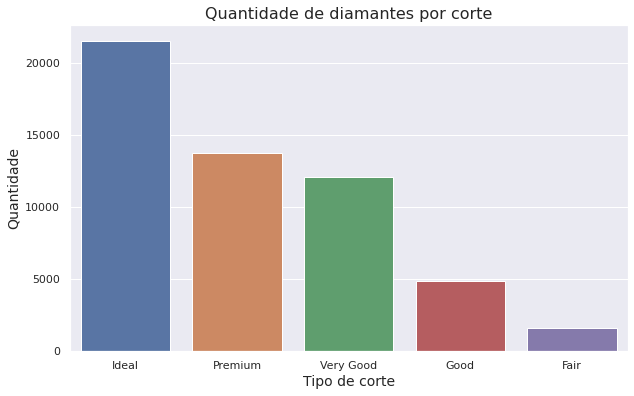

In [347]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.countplot(x = "cut", data = diamond, order = diamond['cut'].value_counts().index)
ax.set_title('Quantidade de diamantes por corte', fontsize = 16)
ax.set_xlabel('Tipo de corte', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

In [348]:
print('Cada corte possui {} diamantes para Ideal, {} diamantes para Premium, \n{} diamantes para Very Good, {} diamantes para Good, {} diamantes para Fair.'.format(
    cut_counts[0], cut_counts[1], cut_counts[2],
    cut_counts[3], cut_counts[4]))

Cada corte possui 21548 diamantes para Ideal, 13780 diamantes para Premium, 
12081 diamantes para Very Good, 4902 diamantes para Good, 1609 diamantes para Fair.


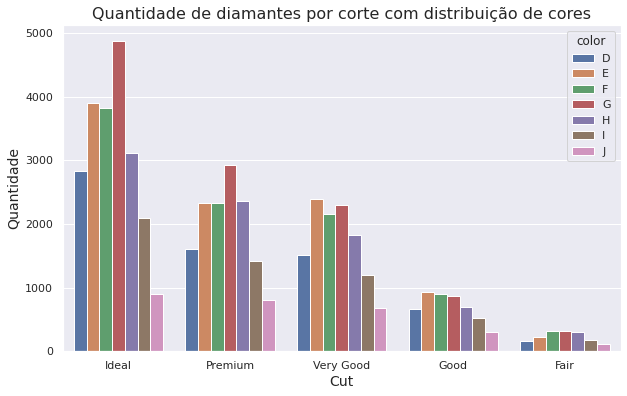

In [349]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.countplot(x = "cut", data = diamond, hue = 'color')
ax.set_title('Quantidade de diamantes por corte com distribuição de cores', fontsize = 16)
ax.set_xlabel('Cut', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

Esta é a forma como as as cores se distribuem com relação aos tipos de cortes. Nota-se uma predominância das cores G e E nos primeiros cortes e este comportamento vai se acentuando ao longo das distribuições.

In [350]:
diamond_mean_price_by_cut = diamond.groupby(['cut']).mean().price.round(2).sort_values(ascending = False)
diamond_mean_price_by_cut = pd.DataFrame(diamond_mean_price_by_cut)
diamond_mean_price_by_cut.rename(columns = {'price':'preço médio'}, inplace = True)
diamond_mean_price_by_cut

,preço médio
cut,
Premium,4579.68
Fair,4357.50
Very Good,3981.66
Good,3926.40
Ideal,3456.94


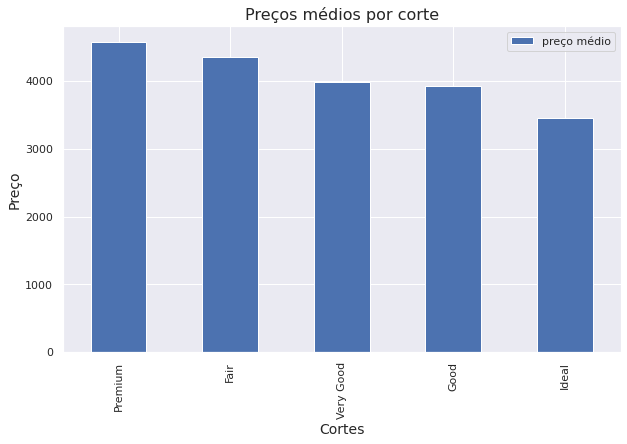

In [351]:
diamond_mean_price_by_cut.plot.bar()
plt.title("Preços médios por corte", fontsize = 16)
plt.xlabel("Cortes", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [352]:
diamond_median_price_by_cut = diamond.groupby(['cut']).median().price.round(2).sort_values(ascending = False)
diamond_median_price_by_cut = pd.DataFrame(diamond_median_price_by_cut)
diamond_median_price_by_cut.rename(columns = {'price': 'mediana do preço'}, inplace = True)
diamond_median_price_by_cut

,mediana do preço
cut,
Fair,3282.0
Premium,3182.0
Good,3050.5
Very Good,2647.0
Ideal,1809.5


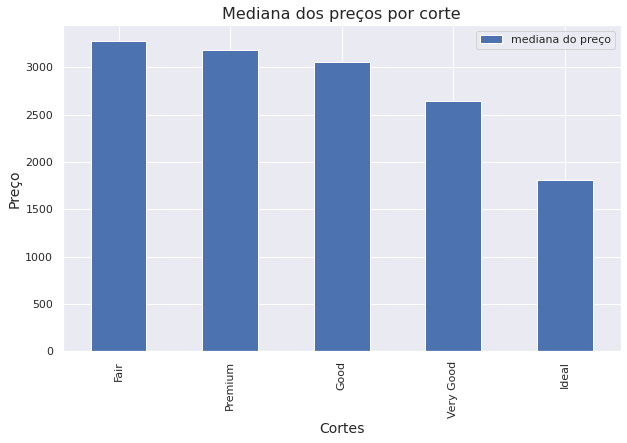

In [353]:
diamond_median_price_by_cut.plot.bar()
plt.title("Mediana dos preços por corte", fontsize = 16)
plt.xlabel("Cortes", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [354]:
diamond_std_price_by_cut = diamond.groupby(['cut']).std().price.round(2).sort_values(ascending = False)
diamond_std_price_by_cut = pd.DataFrame(diamond_std_price_by_cut)
diamond_std_price_by_cut.rename(columns = {'price':'desvio padrão do preço'}, inplace = True)
diamond_std_price_by_cut

,desvio padrão do preço
cut,
Premium,4343.91
Very Good,3936.01
Ideal,3808.09
Good,3676.77
Fair,3561.14


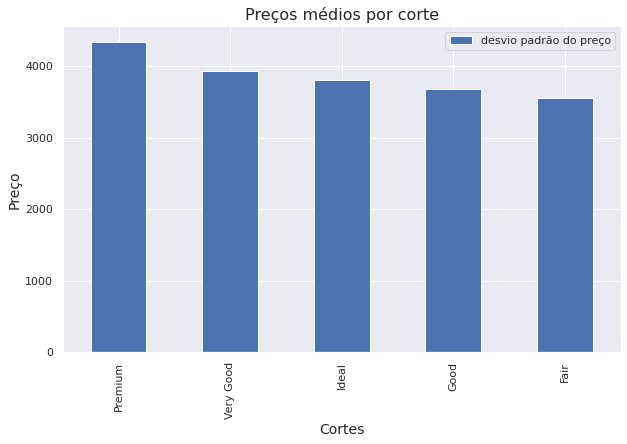

In [355]:
diamond_std_price_by_cut.plot.bar()
plt.title("Preços médios por corte", fontsize = 16)
plt.xlabel("Cortes", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

Bem como a clareza, o corte também possui intuitivamente uma relação linear com o preço.

# Color

In [356]:
cut_counts = diamond['color'].value_counts()
cut_counts

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

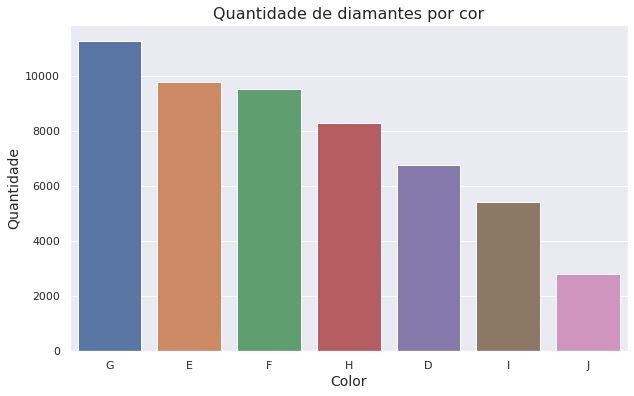

In [357]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.countplot(x = "color", data = diamond, order = diamond['color'].value_counts().index)
ax.set_title('Quantidade de diamantes por cor', fontsize = 16)
ax.set_xlabel('Color', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

In [358]:
print('Cada cor possui {} diamantes para G, {} diamantes para E, {} diamantes para F, \n{} diamantes para H, {} diamantes para D, {} diamantes para I, {} diamantes para J.'.format(
    cut_counts[0], cut_counts[1], cut_counts[2],
    cut_counts[3], cut_counts[4], cut_counts[5],
    cut_counts[6]))

Cada cor possui 11284 diamantes para G, 9797 diamantes para E, 9538 diamantes para F, 
8298 diamantes para H, 6774 diamantes para D, 5421 diamantes para I, 2808 diamantes para J.


In [359]:
diamond_mean_price_by_color = diamond.groupby(['color']).mean().price.round(2).sort_values(ascending = False)
diamond_mean_price_by_color = pd.DataFrame(diamond_mean_price_by_color)
diamond_mean_price_by_color.rename(columns = {'price': 'média do preço'}, inplace = True)
diamond_mean_price_by_color

,média do preço
color,
J,5323.82
I,5089.97
H,4480.94
G,3996.88
F,3725.08
D,3168.11
E,3076.75


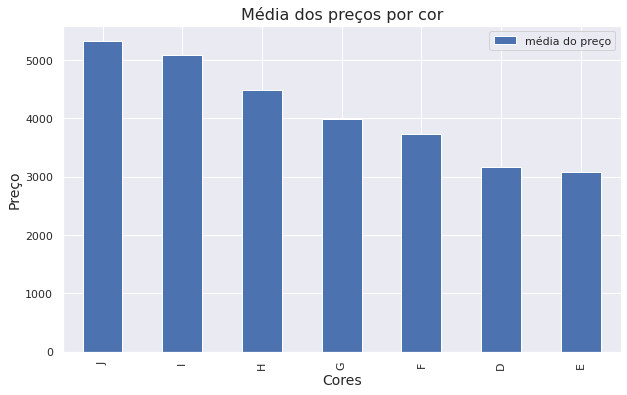

In [360]:
diamond_mean_price_by_color.plot.bar()
plt.title("Média dos preços por cor", fontsize = 16)
plt.xlabel("Cores", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [361]:
diamond_median_price_by_color = diamond.groupby(['color']).median().price.round(2).sort_values(ascending = False)
diamond_median_price_by_color = pd.DataFrame(diamond_median_price_by_color)
diamond_median_price_by_color.rename(columns = {'price':'mediana do preço'}, inplace = True)
diamond_median_price_by_color

,mediana do preço
color,
J,4234.0
I,3730.0
H,3453.5
F,2343.5
G,2240.0
D,1836.5
E,1739.0


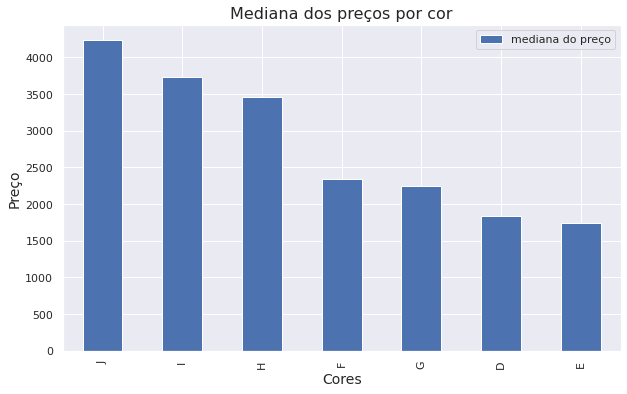

In [362]:
diamond_median_price_by_color.plot.bar()
plt.title("Mediana dos preços por cor", fontsize = 16)
plt.xlabel("Cores", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

In [363]:
diamond_std_price_by_color = diamond.groupby(['color']).std().price.round(2).sort_values(ascending = False)
diamond_std_price_by_color = pd.DataFrame(diamond_std_price_by_color)
diamond_std_price_by_color.rename(columns = {'price':'desvio padrão do preço'}, inplace = True)
diamond_std_price_by_color

,desvio padrão do preço
color,
I,4720.75
J,4438.19
H,4208.83
G,4049.17
F,3785.69
D,3353.39
E,3344.16


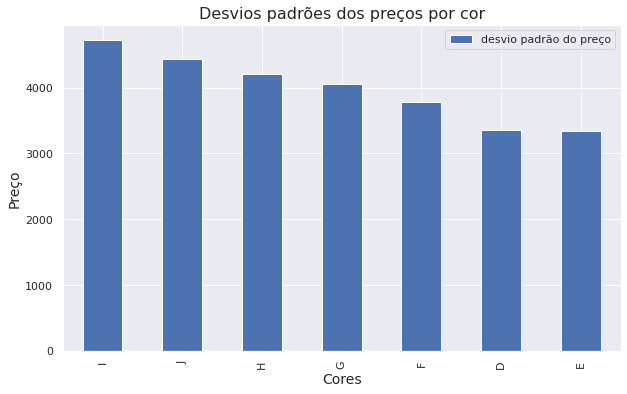

In [364]:
diamond_std_price_by_color.plot.bar()
plt.title("Desvios padrões dos preços por cor", fontsize = 16)
plt.xlabel("Cores", fontsize = 14)
plt.ylabel("Preço", fontsize = 14)
plt.show()

Bem como as duas variáveis anteriores, a cor também apresenta um decréscimo linear com o preço.

# Obtendo as correlações entre as variáveis

Considerando que as estatísticas descritivas possuem relações lineares com o preço, vamos checar as correlações entre as variáveis e testar a hipótese levantada pelo estudo dos gráficos.

In [365]:
correlacao = diamond.corr().round(4)
correlacao

,carat,depth,table,price,x,y,z
carat,1.0000,0.0283,0.1816,0.9216,0.9778,0.9540,0.9610
depth,0.0283,1.0000,-0.2957,-0.0107,-0.0250,-0.0291,0.0950
table,0.1816,-0.2957,1.0000,0.1272,0.1961,0.1845,0.1525
price,0.9216,-0.0107,0.1272,1.0000,0.8872,0.8679,0.8682
x,0.9778,-0.0250,0.1961,0.8872,1.0000,0.9749,0.9754
y,0.9540,-0.0291,0.1845,0.8679,0.9749,1.0000,0.9567
z,0.9610,0.0950,0.1525,0.8682,0.9754,0.9567,1.0000


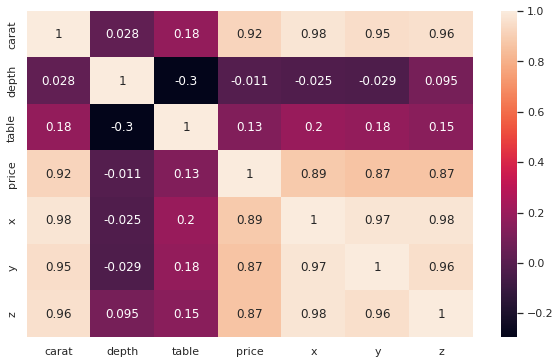

In [366]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.heatmap(data = correlacao, annot = True)

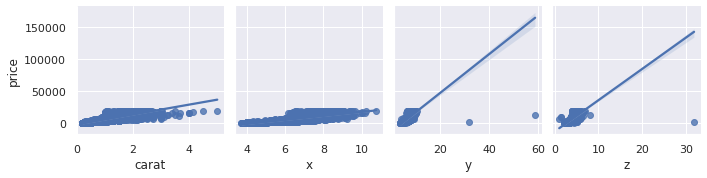

In [367]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'price', x_vars = ['carat', 'x', 'y', 'z'], kind = 'reg')

De fato, é possível notar uma forte correlação entre as variáveis carat, x, y e z com o preço como nota-se no heatmap e analisando as retas de regressão das variáveis com relação ao preço.

# Distribuições

Estudemos agora a distribuição de diamantes presentes no dataset com relação as variáveis carats e depth.

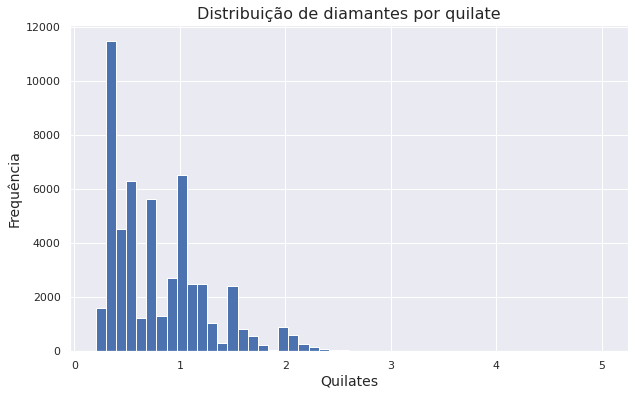

In [368]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['carat'], bins = 50)
plt.xlabel('Quilates', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.title('Distribuição de diamantes por quilate', fontsize = 16)
plt.show()

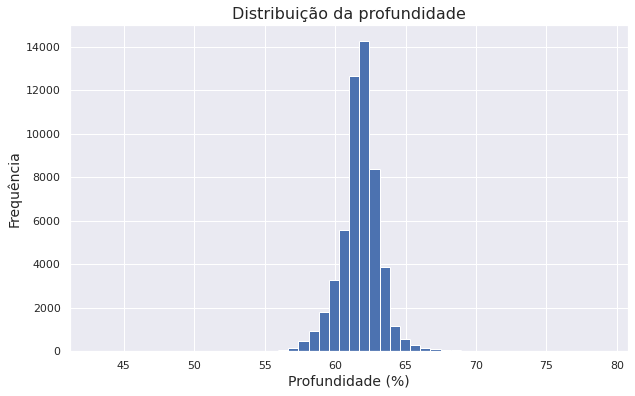

In [369]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['depth'], bins = 50)
plt.xlabel('Profundidade (%)', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.title('Distribuição da profundidade', fontsize = 16)
plt.show()

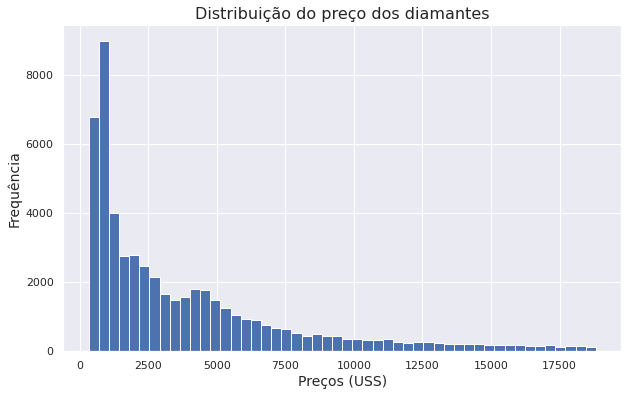

In [370]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['price'], bins = 50)
plt.xlabel('Preços (USS)', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.title('Distribuição do preço dos diamantes', fontsize = 16)
plt.show()

# Modelo de regressão linear

Ao constatar uma alta correlação com o preço e as variáveis, utilizemos a biblioteca sklearn do Python para tentar prever os valores do preço com relação a estas variáveis.

In [371]:
y1 = diamond[['carat', 'x', 'y', 'z']]
X1 = diamond[['price']]

In [372]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2811)

In [373]:
model1 = LinearRegression()

In [374]:
model1.fit(X1_train, y1_train)

LinearRegression()

In [375]:
model1.score(X1_test, y1_test)

0.7921482731952154

In [376]:
porcentagem_model1 = (model1.score(X1_test, y1_test) * 100).round(2)

In [377]:
print('A acurácia do modelo foi de {}%.'.format(porcentagem_model1))

A acurácia do modelo foi de 79.21%.


# Modelo de regressão linear "linearizado"

É possível melhorar a acurácia do nosso modelo linearizando as variáveis utilizando a função logaritmo da seguinte forma:

In [378]:
diamond['log_price'] = np.log(diamond['price'])
diamond['log_carat'] = np.log(diamond['carat'])
diamond['log_x'] = np.log(diamond['x'])
diamond['log_y'] = np.log(diamond['y'])
diamond['log_z'] = np.log(diamond['z'])

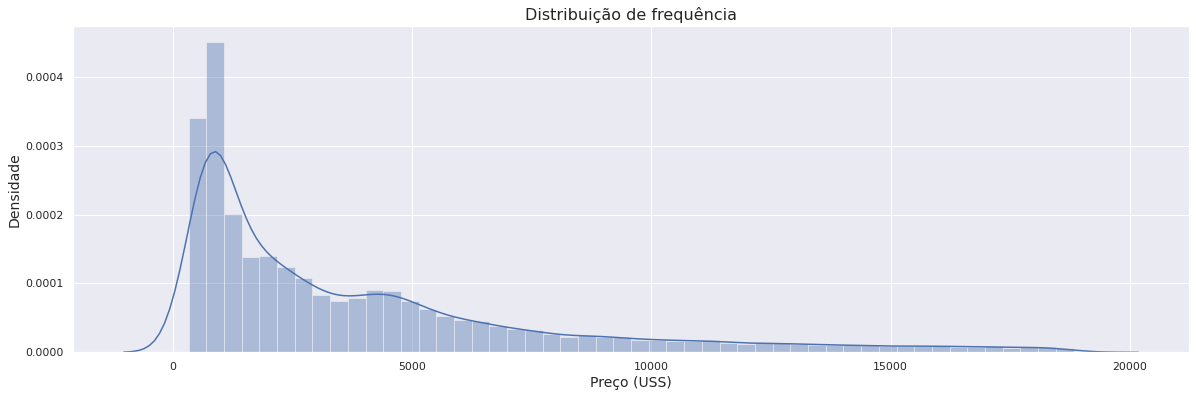

In [379]:
ax = sns.distplot(diamond['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize = 16)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Preço (USS)', fontsize = 14)
ax = ax

Esta é a distribuição dos preços antes de linearizar.

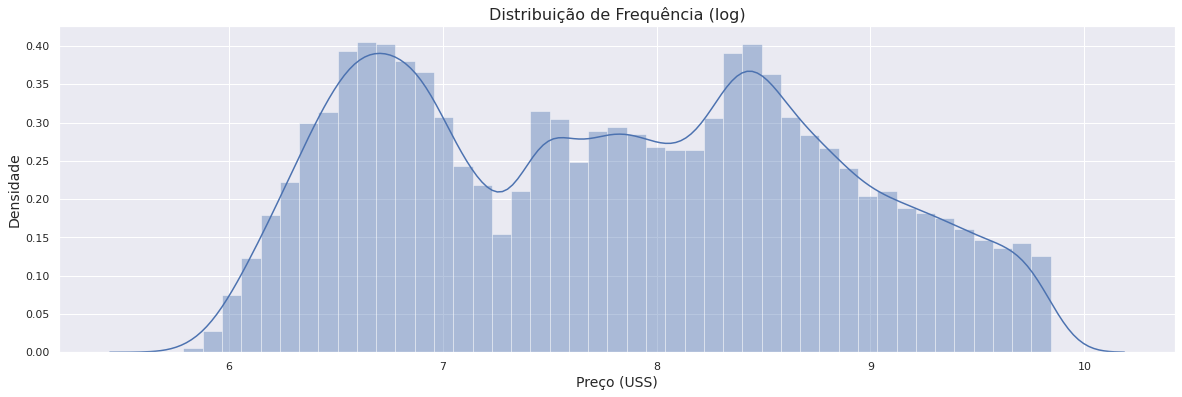

In [408]:
ax = sns.distplot(diamond['log_price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequência (log)', fontsize = 16)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Preço (USS)', fontsize = 14)
ax = ax

Esta é a distribuição dos preços após a linearização, aproximando-se muito mais de uma distribuição normal que no caso anterior.

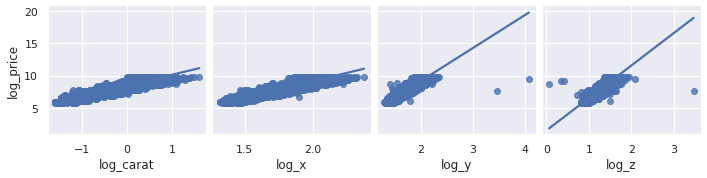

In [381]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'log_price', x_vars = ['log_carat', 'log_x', 'log_y', 'log_z'], kind = 'reg')

In [382]:
y2 = diamond[['log_carat', 'log_x', 'log_y', 'log_z']]
X2 = diamond[['log_price']]

In [383]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2811)

In [384]:
model2 = LinearRegression()

In [385]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [386]:
model2.score(X2_test, y2_test)

0.9298586804024352

In [387]:
porcentagem_model2 = (model2.score(X2_test, y2_test) * 100).round(2)

In [388]:
print('A acurácia do modelo linearizado foi de {}%'.format(porcentagem_model2))

A acurácia do modelo linearizado foi de 92.99%


## Comparando os dois modelos

In [389]:
variacao_do_modelo = (porcentagem_model2 - porcentagem_model1).round(2)

In [390]:
print('Com a linearização das variáveis, houve um aumento de {}% na acurácia do modelo.'.format(variacao_do_modelo))

Com a linearização das variáveis, houve um aumento de 13.78% na acurácia do modelo.
